# **Random Forest - Regression**

# **The Data**
We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

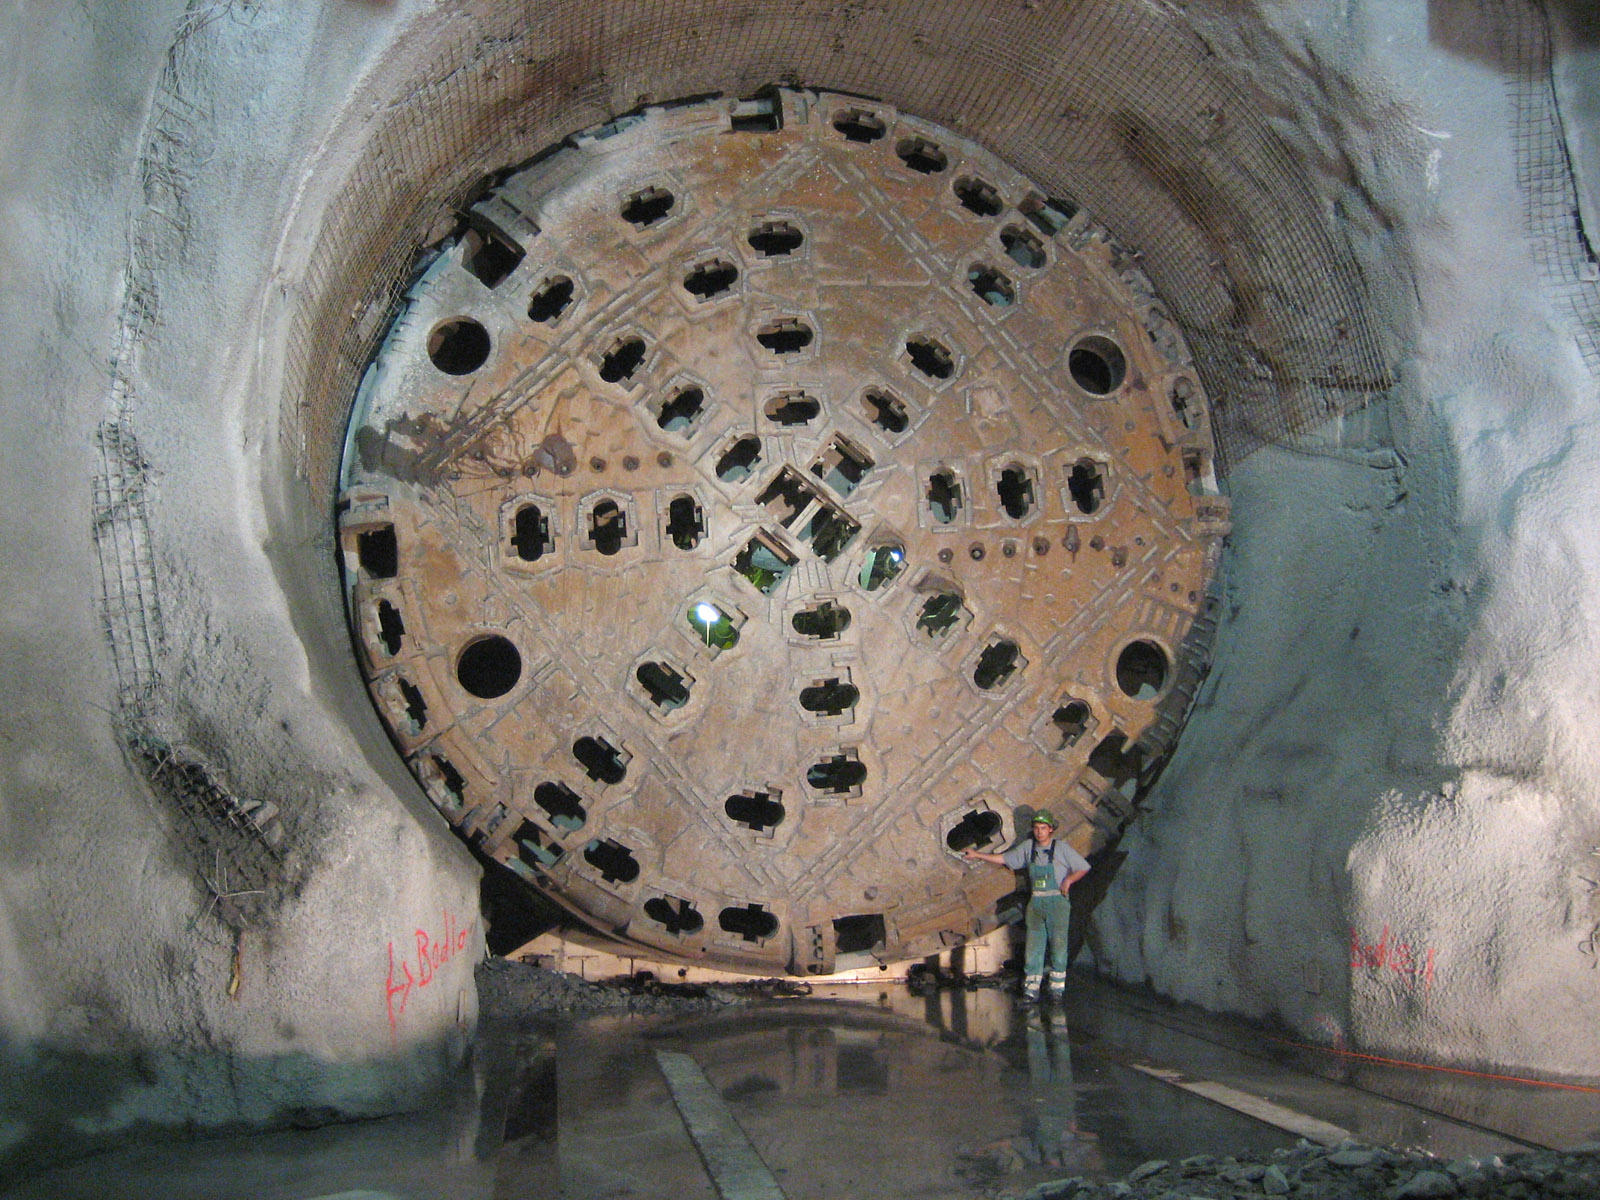

**The project is to build a generalized model, which could use to accept a rebound signal, and output an expected rock density.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rebound Signal Strength nHz,300.0,49.725766,28.341792,0.700227,25.685798,50.602886,74.854294,98.831658
Rock Density kg/m3,300.0,2.225063,0.314512,1.500000,1.987830,2.268597,2.476944,2.750000


**Rename the columns**

In [6]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

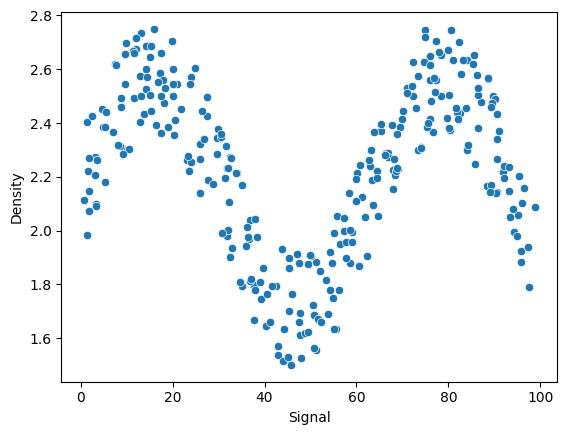

In [7]:
sns.scatterplot(x = 'Signal',y = 'Density',data = df)

**Splitting the Data**

In [9]:
x = df['Signal'].values.reshape(-1,1) # as we only have single feature, we need to reshape the value =>  turn to numpy array => reshape it
y = df['Density']

In [10]:
x[:5]

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 101)

#**1) Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [17]:
lr_pred = lr_model.predict(x_test)

In [18]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [19]:
#Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test,lr_pred)
MSE = mean_squared_error(y_test,lr_pred)
print(MAE)
print(MSE)

0.211198973318633
0.06605167265148638


In [23]:
print(f'RMSE:{np.sqrt(MAE)}')

RMSE:0.45956389470739867


In [24]:
  # check the mean value of Density
  df['Density'].mean()

np.float64(2.225062949323796)

In [25]:
100 * MAE / df['Density'].mean()

np.float64(9.491820147507156)

**So our model is off by about 9.5% of the actual value based on MAE.**

It seems like our model is performing not too bad. However, if we look closer to the value of predictions, the predicted values are very similar around (2... something). This indicates something is happening.

But, what does it looks like? We can make some predictions on new data to test out whether our assumption is correct or not.

# **Predictions on new data and Visualization**

In [26]:
signal_range = np.arange(0, 100)

In [27]:
signal_pred = lr_model.predict(signal_range.reshape(-1,1))

We can compare the acutal shape of the data and Prediction of our model's shape.

**Our model is NOT even picking up the similar shape at all. All predictions are around 2.2 and fitting which looks like a line**

<Axes: xlabel='Signal', ylabel='Density'>

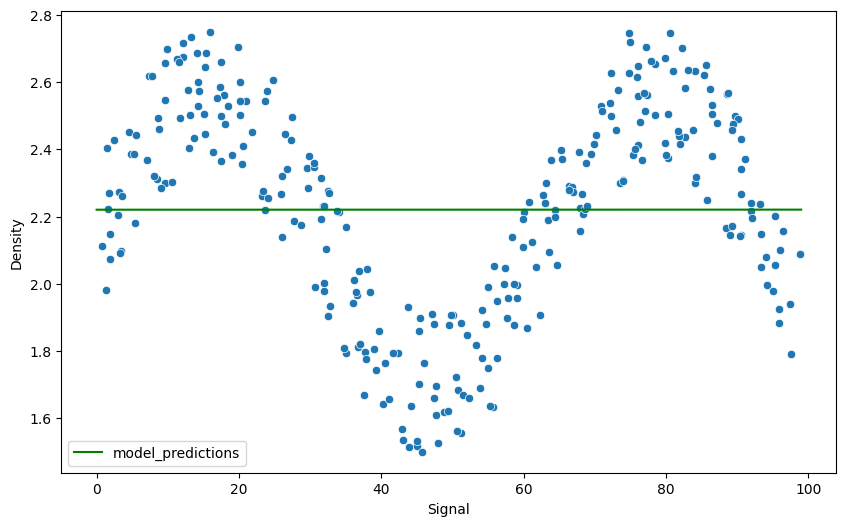

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x = 'Signal',y = 'Density')
sns.lineplot(x = signal_range,y = signal_pred,color = 'green',label = 'model_predictions')

#**Summary:**
So our linear model is not working well enough, we need to explore more models.

We need to look for any similarity of prediction values.
Performance metrics like MAE is not enough
Visulalization is important and helpful. We need to visualize the predictions against true values.

# **2) Polynomial Regression**

**Attempting with a Polynomial Regression Model**

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

**Helper function to run model**

In [38]:
def run_model(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  preds = model.predict(x_test)
  mae = mean_absolute_error(y_test,preds)
  rmse = np.sqrt(mean_squared_error(y_test,preds))
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')

  signal_range = np.arange(1,100)
  signal_pred = model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize = (10,6))
  sns.scatterplot(data = df,x = 'Signal',y = 'Density')
  sns.lineplot(x = signal_range,y = signal_pred,color = 'green',label = 'model_predictions')

MAE: 0.211198973318633
RMSE: 0.2570051996584629


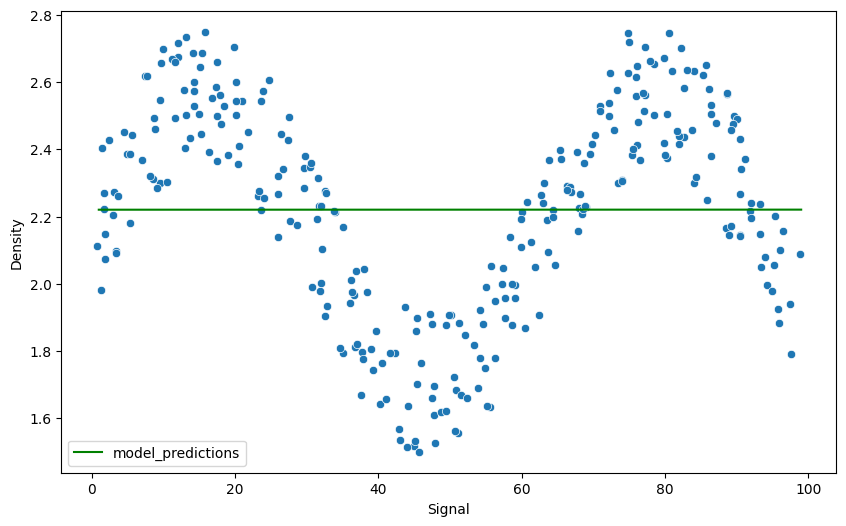

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
run_model(model,x_train,x_test,y_train,y_test)

#**Pipeline for Poly Orders**

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

**2 degree Polynomial**

In [43]:
pipe = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())

MAE: 0.22903105443511335
RMSE: 0.2817309563725596


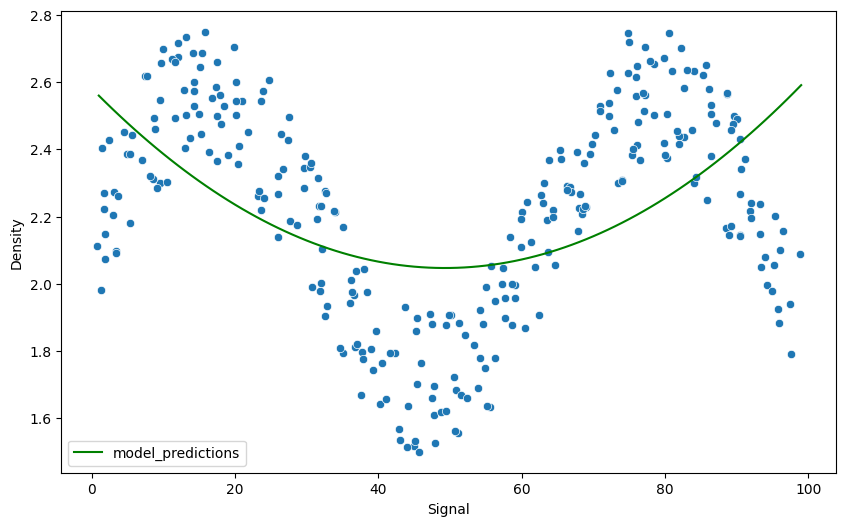

In [44]:
run_model(pipe,x_train,x_test,y_train,y_test)

**3 degree Polynomial**

MAE: 0.24211834039531543
RMSE: 0.2879748127918895


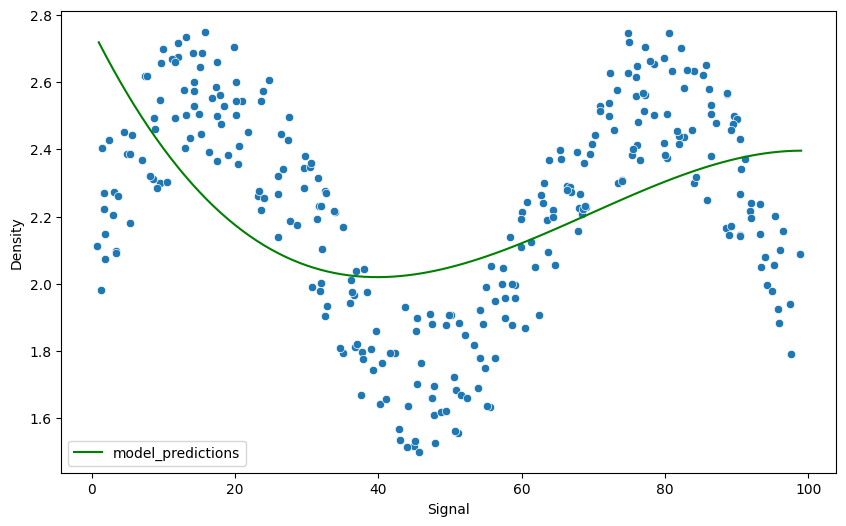

In [45]:
pipe = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())
run_model(pipe,x_train,x_test,y_train,y_test)

**6 degree Polynomial**

MAE: 0.11969122389483997
RMSE: 0.13807449061369673


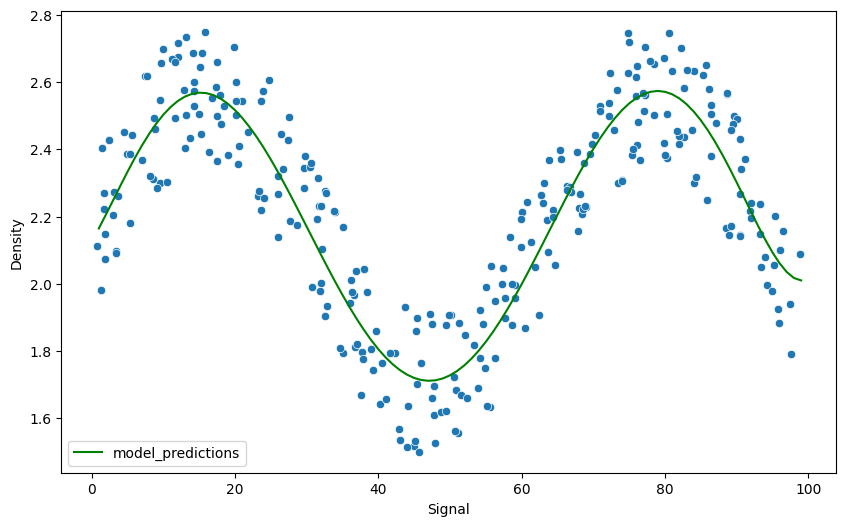

In [46]:
pipe = make_pipeline(PolynomialFeatures(degree = 6),LinearRegression())
run_model(pipe,x_train,x_test,y_train,y_test)

**10 degree Polynomial**

MAE: 0.14338577194053312
RMSE: 0.1626900529299545


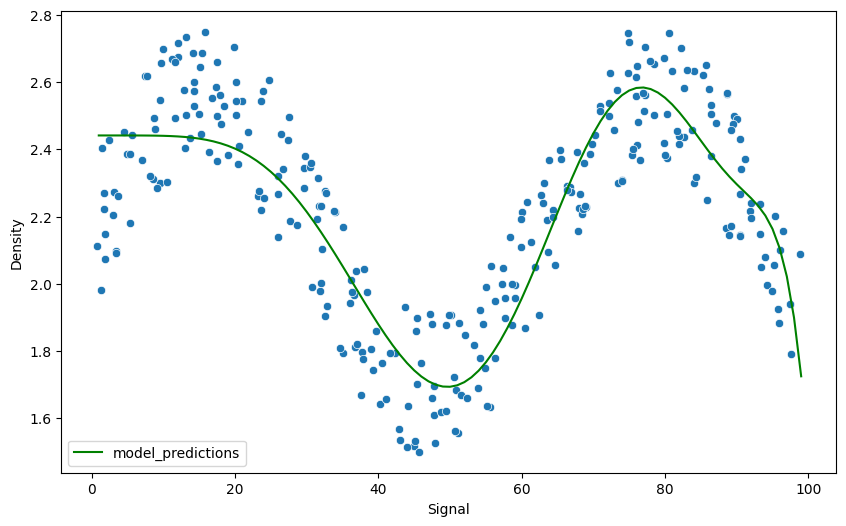

In [47]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression()) # make piepline with 2nd degree polynomail model using linear regression
run_model(pipe, x_train, x_test, y_train, y_test)

If we know that our Signal is always between 0 and 100, then we can be satisfied with degree 6.

But what if we want to expand Signal range beyond 100? And we don't have any data points for that. And we don't know what to expect and how it is going to fit.

That's when we need to check more robust model (Advanced following Models)

#**Advanced Models**

#**3) KNN Regression**

In [48]:
from sklearn.neighbors import KNeighborsRegressor

At 1 Value of nearest neighbors
MAE: 0.11877297474442378
RMSE: 0.1523487028635337
At 5 Value of nearest neighbors
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
At 10 Value of nearest neighbors
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
At 20 Value of nearest neighbors
MAE: 0.1207030971917154
RMSE: 0.1397499127378895


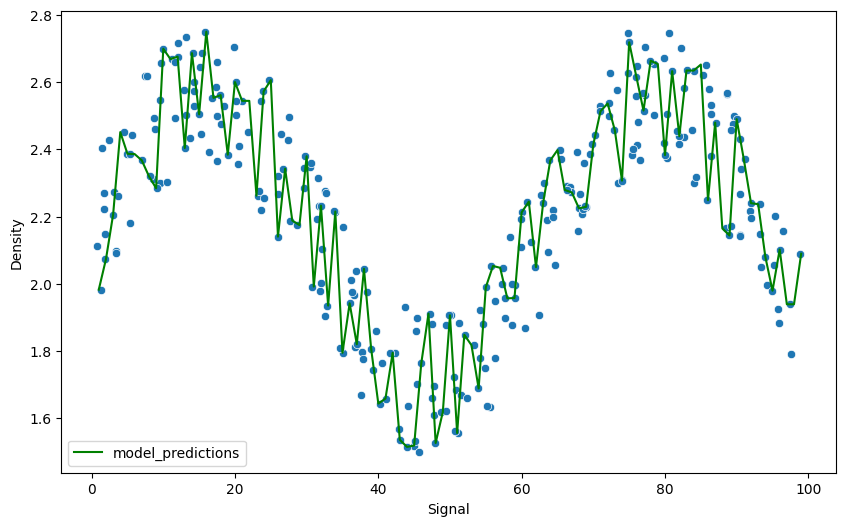

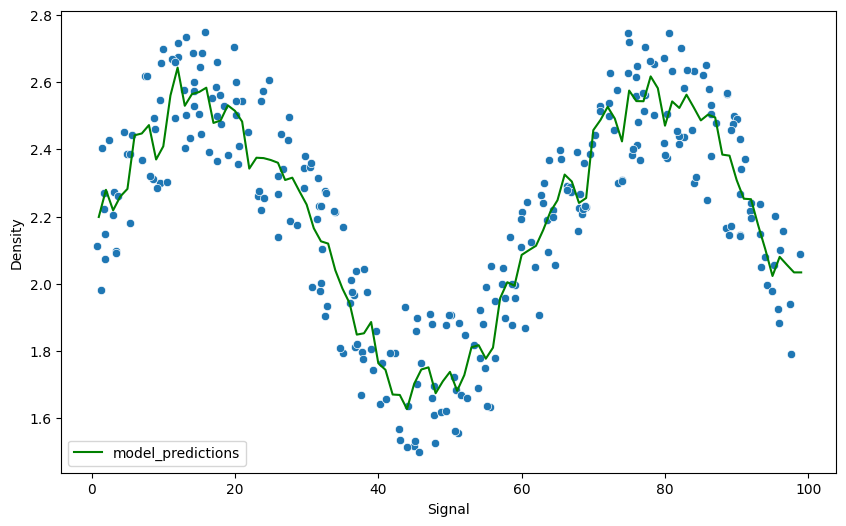

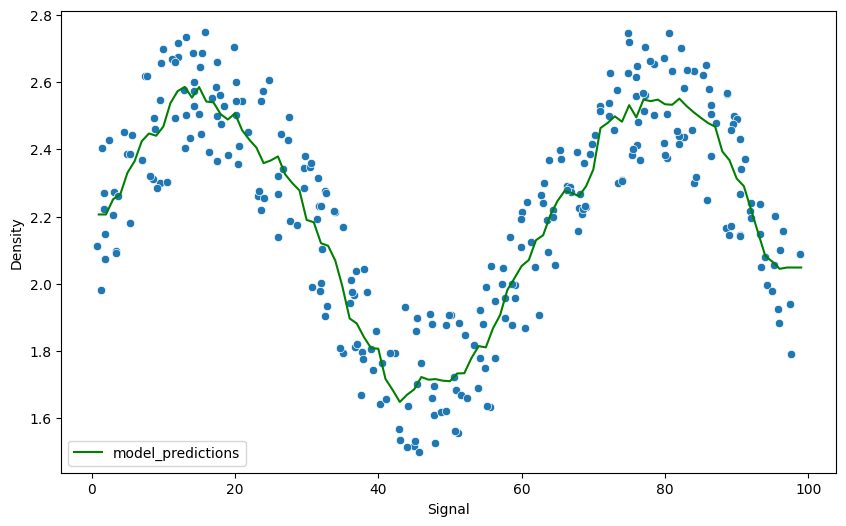

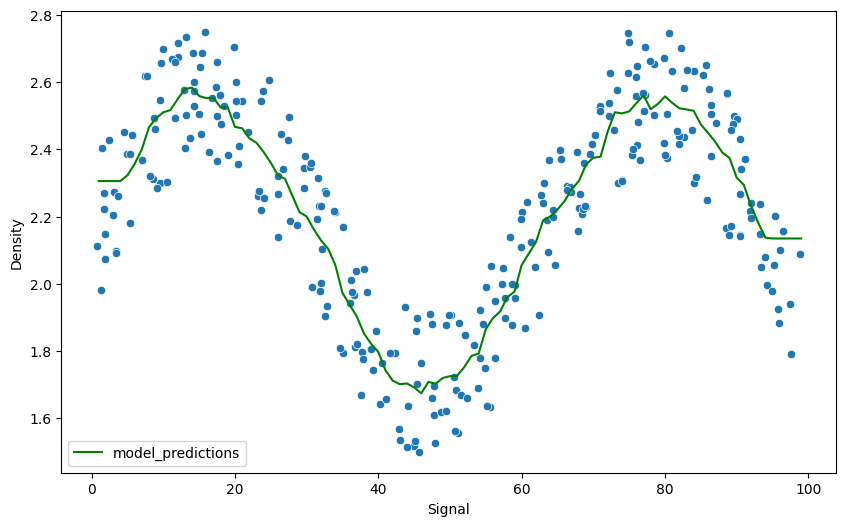

In [52]:
k_values = [1,5,10,20]

for k in k_values:
  model = KNeighborsRegressor(n_neighbors = k)
  print(f'At {k} Value of nearest neighbors')
  run_model(model,x_train,x_test,y_train,y_test)


As we can see the in the first model, there are a a lof of nosies (variances), seem like over fitting.

In the second model, the line is much more smoother introducing more bias with less varaiances.

In the fourth model, thare is too much bias and the line start to get flat at the beginning and end.

So our best choice is reasonable thrid model.

# **4) Decision Tree Regression**

In [54]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


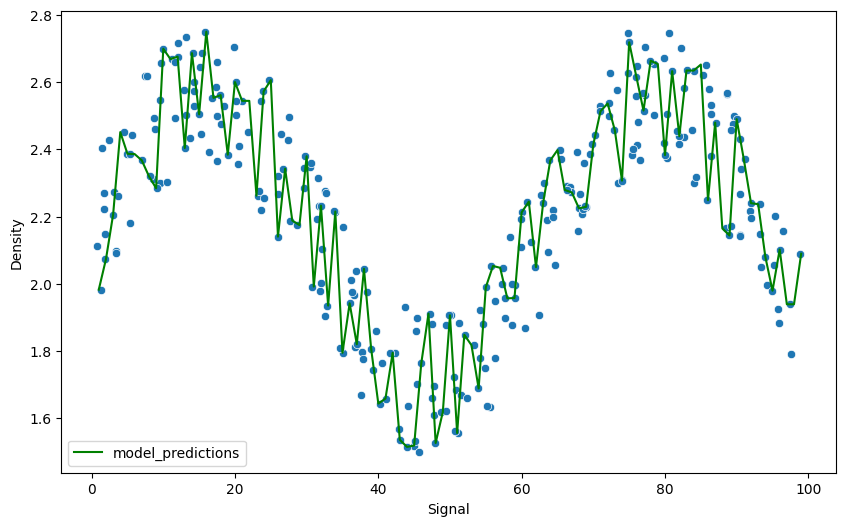

In [55]:
model = DecisionTreeRegressor()
run_model(model,x_train,x_test,y_train,y_test)

#**5) Support Vector Regression**

In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [58]:
model = SVR()
param_grid = {
    'C':np.linspace(0,1,20),
    'gamma':['auto','scale']
}

grid = GridSearchCV(model,param_grid)

MAE: 0.12017510123813935
RMSE: 0.13498358709618383


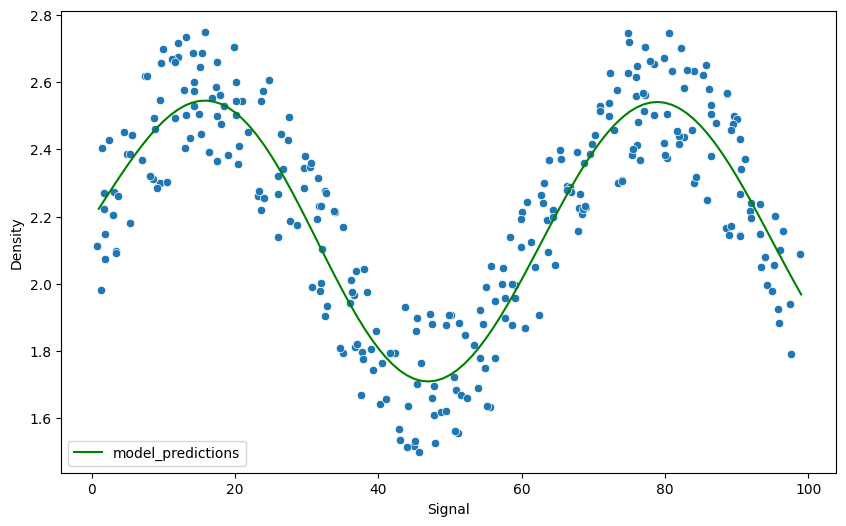

In [59]:
run_model(grid,x_train,x_test,y_train,y_test)

In [60]:
grid.best_params_

{'C': np.float64(1.0), 'gamma': 'scale'}

In [61]:
grid.best_score_

np.float64(0.8049048415804858)

In [62]:
grid.best_estimator_

SVR(C=np.float64(1.0))

In [63]:
grid.best_index_

np.int64(39)

# **6) Random Forest Regression**

In [64]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.11677134084451267
RMSE: 0.1396533882338474


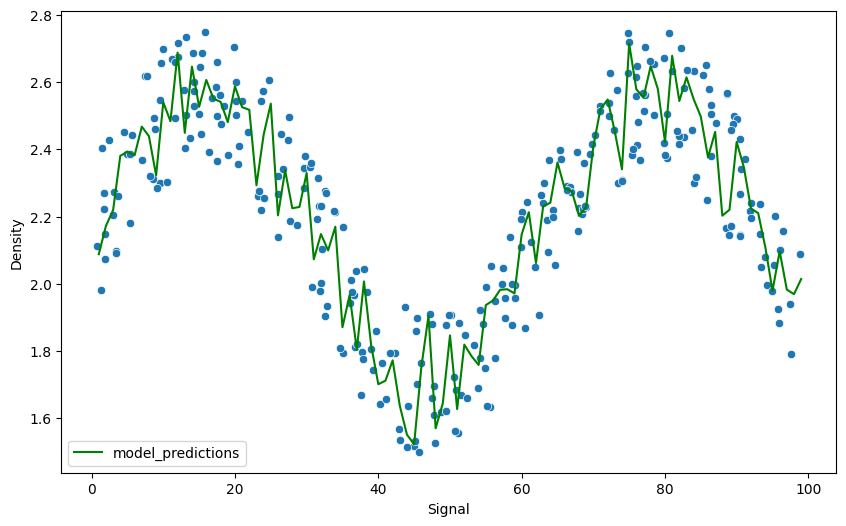

In [65]:
model = RandomForestRegressor(n_estimators = 10)
run_model(model,x_train,x_test,y_train,y_test)

#**7) Gradient Boosting**

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


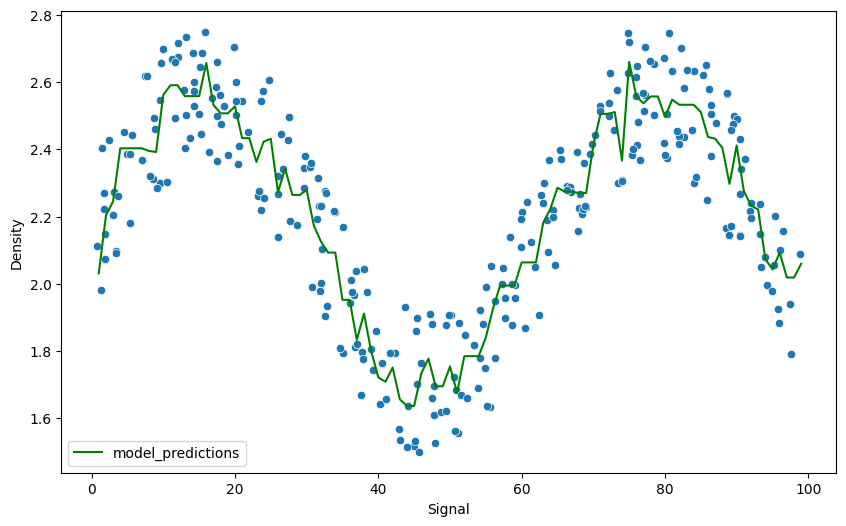

In [67]:
model = GradientBoostingRegressor()
run_model(model,x_train,x_test,y_train,y_test)

#**8) Adaboost**

In [68]:
from sklearn.ensemble import AdaBoostRegressor

MAE: 0.11399272833510787
RMSE: 0.13359454513829933


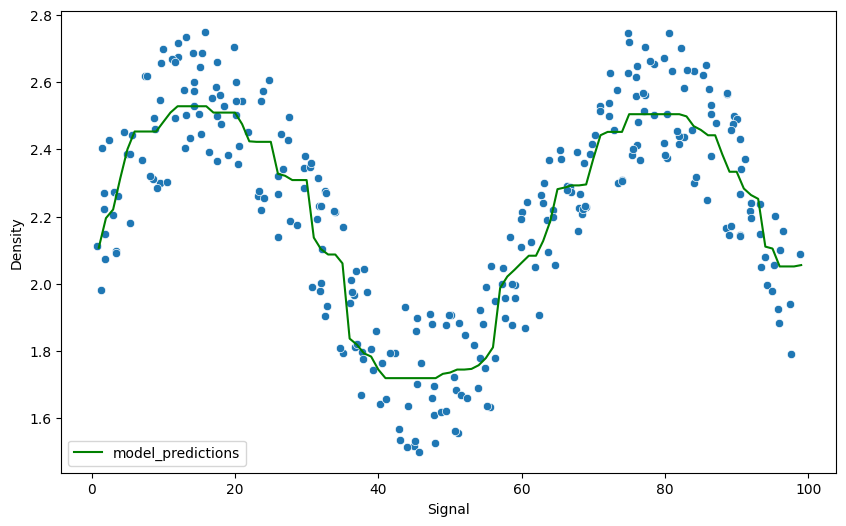

In [69]:
model = AdaBoostRegressor()
run_model(model,x_train,x_test,y_train,y_test)

**Among Advance Model we used SVM performed well and give smooth curve**